In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

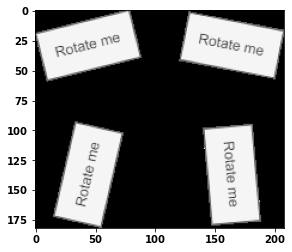

In [8]:
name1 = 'transform_4points.drawio.png'
img1 = cv.imread(name1, cv.IMREAD_GRAYSCALE)
plt.imshow(img1, plt.cm.gray);

len(contours)=4


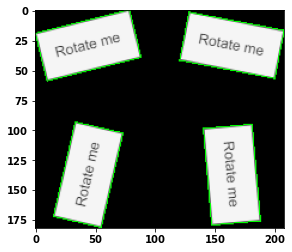

In [11]:
contours, _ = cv.findContours(img1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_draw = cv.cvtColor(img1, cv.COLOR_GRAY2BGR)
cv.drawContours(img_draw, contours, -1, (0, 255, 0), 1)
plt.imshow(img_draw);

In [12]:
cv.minAreaRect(contours[0])
    

((164.0, 137.0), (81.96595764160156, 41.979148864746094), 84.98689270019531)

In [15]:
def approx_contour(contour, n_points=4, max_iteration=1000):
    """Approcimates a opencv contour down to n_points using cv.approxPolyDP() 

    Args:
        contour (contour): contour to be approximated
        n_points (int, optional): Desired number of points for the returned contour. Defaults to 4.
        max_iteration (int, optional): Don't try forever. Defaults to 1000.

    Returns:
        Contour / or None: Approximated countour
    """
    fract = 0.1            # fraction of the perimeter as a measure for approximation detail
    fract_mod = 2.0        # modify fract by this factor in the next trial
    for _ in range(max_iteration):
        apx = cv.approxPolyDP(contour, fract * cv.arcLength(contour, True), True)
        if len(apx) > n_points:   # More than n_point approximation: Too detailed!
            fract *= fract_mod
        elif len(apx) < n_points:   # Less than n_point approximation: Too crude
            fract /= fract_mod
            fract_mod *= 0.9  # safety measure: Reduce step size to exclude oscillation around a small target
        elif len(apx) == n_points:
            return apx 
            
    print("Waring: Approximation to 4 points failed")

In [16]:
for c in contours:
    apx = approx_contour(c)
    print(len(c), len(apx))

44 4
112 4
94 4
118 4


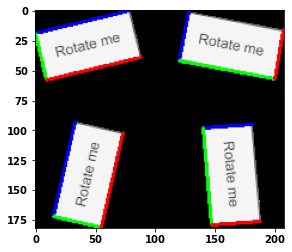

In [52]:
img_draw = cv.cvtColor(img1, cv.COLOR_GRAY2RGB)
for i, c in enumerate(contours):
    apx = approx_contour(c)
    cv.line(img_draw, apx[0][0], apx[1][0], (0, 0, 255), 2)
    cv.line(img_draw, apx[1][0], apx[2][0], (0, 255, 0), 2)
    cv.line(img_draw, apx[2][0], apx[3][0], (255, 0, 0), 2)
    
plt.imshow(img_draw);


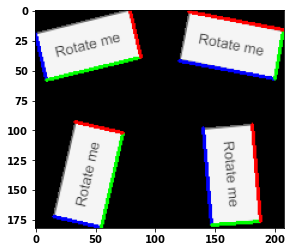

In [51]:
def rotate_contour_points(contour):
    lst = list(contour)
    lst.append(lst.pop(0))
    return np.array(lst)

img_draw = cv.cvtColor(img1, cv.COLOR_GRAY2RGB)
for i, c in enumerate(contours):
    apx = approx_contour(c)
    apx = rotate_contour_points(apx)
    cv.line(img_draw, apx[0][0], apx[1][0], (0, 0, 255), 2)
    cv.line(img_draw, apx[1][0], apx[2][0], (0, 255, 0), 2)
    cv.line(img_draw, apx[2][0], apx[3][0], (255, 0, 0), 2)
    
plt.imshow(img_draw);

In [48]:
def normalize_rectangle(contour):
    """ Normalized an opencv contour in a way that the points are in the same order.

    Arg: contour (np.array) 

    Returns: np.array: Normalized contour
    """
    def calc_distance(p1, p2):
        """Calculate distance between two points
        p1 and p2 in format (x1,y1) and (x2,y2) tuples
        """
        return ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5

    def calc_middle(line):
        """Calculate center point in a line
        """
        p1, p2 = line
        return [int((xy1 + xy2) / 2) for xy1, xy2 in zip(p1[0], p2[0])]
    
    p1, p2, p3, p4 = contour
    if calc_distance(p1[0], p2[0]) < calc_distance(p2[0], p3[0]):
        edge1, edge2 = [p1, p2], [p3, p4]
    else:
        edge1, edge2 = [p1, p4], [p2, p3]
        
    if calc_middle(edge1)[0] < calc_middle(edge2)[0]:
        upper_left, lower_left = edge1
        lower_right, upper_right = edge2
    else:
        upper_left, lower_left = edge2
        lower_right, upper_right = edge1
        
    if upper_left[0][1] < lower_left[0][1]:
        upper_left, lower_left = lower_left, upper_left
    
    if upper_right[0][1] < lower_right[0][1]:
        upper_right, lower_right = lower_right, upper_right
        
    return np.array([upper_left, lower_left, lower_right, upper_right])

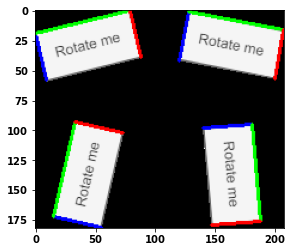

In [54]:
img_draw = cv.cvtColor(img1, cv.COLOR_GRAY2RGB)
for i, c in enumerate(contours):
    apx = approx_contour(c)
    apx = normalize_rectangle(apx)
    cv.line(img_draw, apx[0][0], apx[1][0], (0, 0, 255), 2)
    cv.line(img_draw, apx[1][0], apx[2][0], (0, 255, 0), 2)
    cv.line(img_draw, apx[2][0], apx[3][0], (255, 0, 0), 2)
    
plt.imshow(img_draw);

ul ll lr ur

In [50]:
apx

array([[[ 9, 58]],

       [[ 0, 19]],

       [[79,  0]],

       [[88, 39]]], dtype=int32)

In [55]:
print(list(apx[0]))

[array([ 9, 58], dtype=int32)]


In [57]:
def printc(contour):
    for item in contour:
        print(f"{item}, ", end="")
    print()

In [58]:
printc(apx)

[[ 9 58]],[[ 0 19]],[[79  0]],[[88 39]],
